# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data_set=pd.read_csv("spam.csv",encoding="ISO-8859-1",usecols=[0,1],skiprows=1,names=["labels","msg"])
print(data_set.head())

  labels                                                msg
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
data_set.columns

Index(['labels', 'msg'], dtype='object')

In [4]:
data_set.shape

(5572, 2)

# Data modification

In [5]:
data_set.replace({'labels':{'spam':0,'ham':1}},inplace=True)

In [6]:
data_set.head()

,labels,msg
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# Summary of Dataset

# Checking Null Values

In [7]:
data_set.isnull().sum()

labels    0
msg       0
dtype: int64

# Checking differnt types of unique species

In [8]:
print(data_set.duplicated().sum())
data_set=data_set.drop_duplicates()
data_set.duplicated().sum()

403


0

# Data visualization

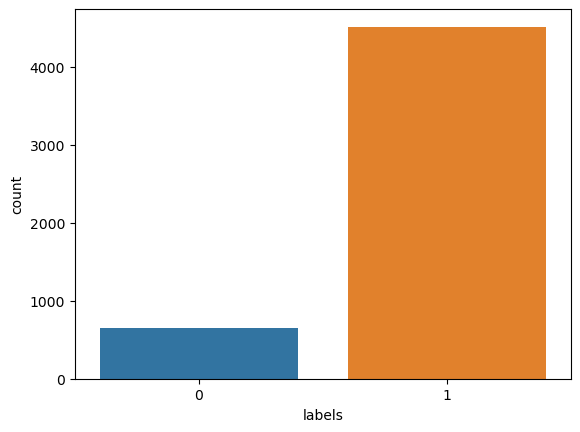

In [9]:
sns.countplot(x="labels",data=data_set)
plt.show()

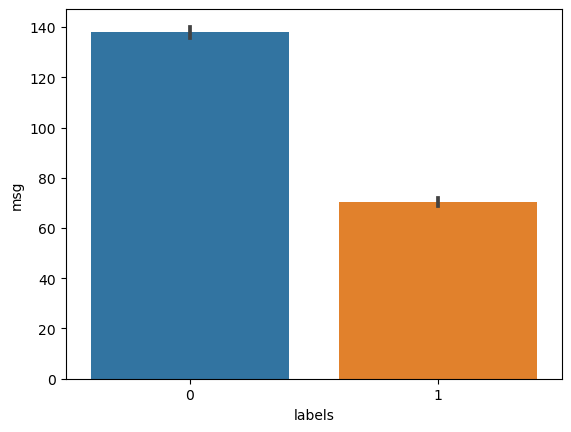

In [10]:
sns.barplot(data_set,y=data_set.msg.apply(len),x='labels')
plt.show()

# Prediction

In [11]:
x=data_set['msg']
y=data_set['labels']

In [12]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 5169, dtype: object

In [13]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: labels, Length: 5169, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: msg, Length: 4135, dtype: object
1617                        Did u download the fring app?
2064    Pass dis to all ur contacts n see wat u get! R...
1272                                                Ok...
3020                       Am in film ill call you later.
3642    Sorry, left phone upstairs. OK, might be hecti...
                              ...

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [17]:
print(x_train)
print(x_test)

  (0, 6765)	1
  (0, 7353)	1
  (0, 4593)	1
  (0, 2667)	1
  (0, 3660)	1
  (1, 7369)	1
  (1, 736)	1
  (1, 6758)	1
  (1, 4877)	1
  (1, 6731)	1
  (2, 6731)	1
  (2, 7233)	1
  (2, 4127)	1
  (2, 4851)	1
  (2, 4692)	1
  (2, 6807)	1
  (3, 2952)	1
  (3, 7172)	1
  (3, 1603)	1
  (3, 5126)	1
  (3, 7444)	1
  (3, 3266)	1
  (3, 5344)	1
  (3, 4066)	1
  (3, 5626)	1
  :	:
  (4133, 2515)	1
  (4133, 5145)	1
  (4133, 6081)	1
  (4134, 7444)	1
  (4134, 1582)	1
  (4134, 3319)	1
  (4134, 2829)	1
  (4134, 4950)	1
  (4134, 6184)	1
  (4134, 7098)	1
  (4134, 6743)	1
  (4134, 4266)	1
  (4134, 3702)	1
  (4134, 4871)	1
  (4134, 7391)	3
  (4134, 1949)	1
  (4134, 4138)	1
  (4134, 6265)	1
  (4134, 5892)	1
  (4134, 802)	1
  (4134, 5688)	1
  (4134, 6754)	1
  (4134, 216)	1
  (4134, 6395)	1
  (4134, 45)	1
  (0, 996)	1
  (0, 2276)	1
  (0, 2411)	1
  (0, 6719)	1
  (1, 890)	1
  (1, 1350)	1
  (1, 1381)	1
  (1, 1870)	1
  (1, 1951)	1
  (1, 2317)	1
  (1, 2721)	1
  (1, 3084)	1
  (1, 3110)	1
  (1, 3127)	1
  (1, 3202)	1
  (1, 3465)	1
  

In [18]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 ... 0 1 1]
1617    1
2064    1
1272    1
3020    1
3642    1
       ..
4146    1
1208    1
4795    0
3575    1
2820    1
Name: labels, Length: 1034, dtype: int64


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[129  16]
 [  1 888]]


0.9835589941972921